In [2]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

**Покемоны и AB-тестирование**

(реальный кейс собеседования на позицию Аналитика).\
Описание задачи:

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

Описание набора данных:\
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:\
pid: Numeric - ID покемона\
HP: Numeric - Очки здоровья\
Attack: Numeric - Сила обычной атаки\
Defense: Numeric - Сила обычной защиты\
Sp. Atk: Numeric - Сила специальной атаки\
Sp. Def: Numeric - Сила специальной защиты\
Speed: Numeric - Скорость движений\
Legendary: Boolean - «True», если покемон редкий\
Class 1: Categorical - Класс покемона\
Class 2: Categorical - Класс покемона

In [9]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [10]:
pokemon.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [11]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


Задачи

Задание № 1:\
Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.\
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;\
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [12]:
pokemon_grass = pokemon[(pokemon['Class 1']=='Grass')&(pokemon['Class 2']!='Rock')|(pokemon['Class 2']=='Grass')&(pokemon['Class 1']!='Rock')]
pokemon_grass.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [13]:
pokemon_rock = pokemon[(pokemon['Class 1']=='Rock')&(pokemon['Class 2']!='Grass')|(pokemon['Class 2'] =='Rock')&(pokemon['Class 1']!='Grass')]
pokemon_rock.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


Создадим функцию проверки данных на нормальность:

In [14]:
def normal_dist(list_data):
    """ Функция проверяет распредление данных на нормальность
    с помощью теста Шапиро-Уилка
    """
    result = []
    for data in list_data:       
        stat, p = stats.shapiro(data)

        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            result.append('Нормальное')
        else:
            result.append('Ненормальное')
    
    return result

In [15]:
normal_dist([pokemon_grass['Attack'], pokemon_rock['Attack']])

stat=0.978, p=0.113
stat=0.982, p=0.586


['Нормальное', 'Нормальное']

Проверим выборки на равенство дисперсий с помощью F-теста

In [16]:
def f_test(group1, group2):
    x = np.array(group1)
    y = np.array(group2)
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    if p_value > 0.05:
        return 'Вариация вероятно одинаковая'
    else:
        return 'Вариация разная'

In [17]:
f_test(pokemon_grass['Attack'], pokemon_rock['Attack'])

'Вариация вероятно одинаковая'

Сравним выборки с помощью t-критерия для выборок разной длины.

In [ ]:
stat, p = stats.ttest_ind(pokemon_grass['Attack'], pokemon_rock['Attack'])

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -3.41694, p = 0.00096
Отклоняем нулевую гипотезу, средние, вероятно, различаются


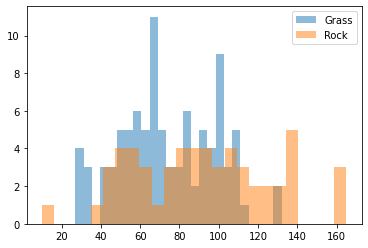

In [ ]:
plt.hist(pokemon_grass['Attack'], bins=25, alpha = 0.5); 
plt.hist(pokemon_rock['Attack'], bins=25, alpha = 0.5);  
plt.legend(['Grass', 'Rock'])

Профессор Оук вероятно ошибся, покемоны в классе rock имеют более сильную обычную атаку, чем у покемонов в классе grass. 

Создадим данные по каждому классу:

In [ ]:
pokemon_fire = pokemon[(pokemon['Class 1']=='Fire')|(pokemon['Class 2'] =='Fire')]
pokemon_water = pokemon[(pokemon['Class 1']=='Water')|(pokemon['Class 2'] =='Water')]
pokemon_dark = pokemon[(pokemon['Class 1']=='Dark')|(pokemon['Class 2'] =='Dark')] 
pokemon_dragon = pokemon[(pokemon['Class 1']=='Dragon')|(pokemon['Class 2'] =='Dragon')]
pokemon_electric = pokemon[(pokemon['Class 1']=='Electric')|(pokemon['Class 2'] =='Electric')]
pokemon_fairy = pokemon[(pokemon['Class 1']=='Fairy')|(pokemon['Class 2'] =='Fairy')]
pokemon_fighting = pokemon[(pokemon['Class 1']=='Fighting')|(pokemon['Class 2'] =='Fighting')]
pokemon_flying = pokemon[(pokemon['Class 1']=='Flying')|(pokemon['Class 2'] =='Flying')]
pokemon_ghost = pokemon[(pokemon['Class 1']=='Ghost')|(pokemon['Class 2'] =='Ghost')]
pokemon_ground = pokemon[(pokemon['Class 1']=='Ground')|(pokemon['Class 2'] =='Ground')]
pokemon_ice = pokemon[(pokemon['Class 1']=='Ice')|(pokemon['Class 2'] =='Ice')]
pokemon_normal = pokemon[(pokemon['Class 1']=='Normal')|(pokemon['Class 2'] =='Normal')]
pokemon_poison = pokemon[(pokemon['Class 1']=='Poison')|(pokemon['Class 2'] =='Poison')]
pokemon_psychic = pokemon[(pokemon['Class 1']=='Psychic')|(pokemon['Class 2'] =='Psychic')]
pokemon_steel = pokemon[(pokemon['Class 1']=='Steel')|(pokemon['Class 2'] =='Steel')]
pokemon_bug = pokemon[(pokemon['Class 1']=='Bug')|(pokemon['Class 2'] =='Bug')]

Задание № 2:\
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.\
Проверьте, прав ли он, и убедите его в своем выводе статистически.\
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;\
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
pokemon_water_2 = pokemon_water[(pokemon_water['Class 1']== 'Water')&(pokemon_water['Class 2']!= 'Normal')|\
                                (pokemon_water['Class 2']== 'Water')&(pokemon_water['Class 1']!= 'Normal')]
pokemon_normal_2 = pokemon_normal[(pokemon_normal['Class 1']!= 'Water')&(pokemon_normal['Class 2']== 'Normal')|\
                                (pokemon_normal['Class 2']!= 'Water')&(pokemon_normal['Class 1']== 'Normal')]  

Проверим нормальность данных:

In [ ]:
normal_dist([pokemon_water_2['Speed'], pokemon_normal_2['Speed']])

stat=0.990, p=0.501
stat=0.988, p=0.497


['Нормальное', 'Нормальное']

In [ ]:
f_test(pokemon_water_2['Speed'], pokemon_normal_2['Speed'])

'Вариация вероятно одинаковая'

In [ ]:
stat, p = stats.ttest_ind(pokemon_water_2['Speed'], pokemon_normal_2['Speed'])

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -2.10119, p = 0.03695
Отклоняем нулевую гипотезу, средние, вероятно, различаются


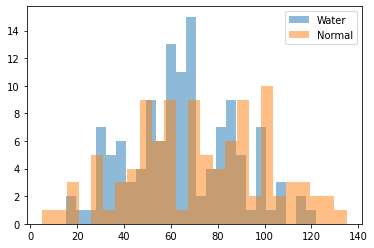

In [ ]:
plt.hist(pokemon_water_2['Speed'], bins=25, alpha = 0.5); 
plt.hist(pokemon_normal_2['Speed'], bins=25, alpha = 0.5);  
plt.legend(['Water', 'Normal'])

Профессор вероятно ошибся, значимые различия есть (на уровне значимости 0,05), но покемоны класса normal вероятно быстрее покемонов класса water. 

Задание № 4:\
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon.\
Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.\
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

Предположим, что доказательством эффективности сыворотки будет то, что средний показатель скорости покемонов с допингом значимо больше среднего показателя скорости остальных покемонов.

In [ ]:
x = np.array(pokemon[pokemon['Name'].isin(treathed_pokemon)]['Speed'])
y = np.array(pokemon[~pokemon['Name'].isin(treathed_pokemon)]['Speed'])

print(f'средняя cкорость ускореенных покемонов: {x.mean()}')
print(f'средняя cкорость неускореенных покемонов: {y.mean()}')


средняя cкорость ускореенных покемонов: 145.0
средняя cкорость неускореенных покемонов: 67.89195979899498


In [ ]:
f_test(x, y)

'Вариация разная'

In [ ]:
stat, p = stats.ttest_ind(x, y, equal_var = False)

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 20.96392, p = 0.00008
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Профессор Дуб вероятно создал эффективную сыворотку для ускорения покемонов.

Следует проверить к какому классу относятся эти покемоны:

In [ ]:
pokemon_treated = pokemon[pokemon['Name'].isin(treathed_pokemon)]
pokemon_treated.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


Теперь посмотрим среднюю скорость по этим классам:

In [ ]:
x = np.array(pokemon[pokemon['Class 1'].isin(['Bug','Psychic','Normal'])]['Speed'])
x.mean()

71.04017857142857

Покемоны, которым дали сыворотку, во-первых, не относятся к одному классу, а во вторых средний показатель скорости по тем классам, к которым они относятся, также сильно меньше, чем их средняя скорость.

Построим граффик по каждому классу:

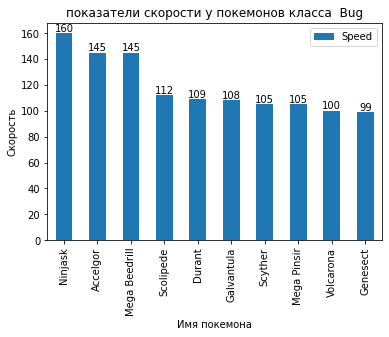

In [ ]:
bug = pokemon_bug[['Name', 'Speed']].groupby('Name').sum().sort_values('Speed', ascending=False).head(10)
bug.plot(kind='bar', title='показатели скорости у покемонов класса  Bug',
                             xlabel='Имя покемона',
                             ylabel='Скорость')
for i, val in enumerate(bug.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

В классе покемона Mega Beedril есть парочка не менее шустрых покемонов, которым не давали сыворотку.

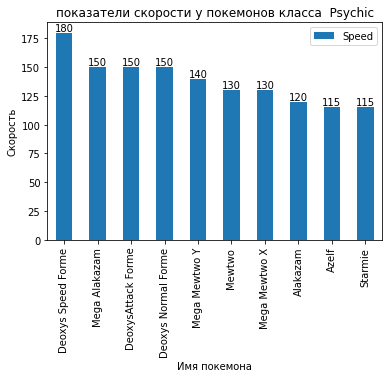

In [ ]:
psychic = pokemon_psychic[['Name', 'Speed']].groupby('Name').sum().sort_values('Speed', ascending=False).head(10)
psychic.plot(kind='bar', title='показатели скорости у покемонов класса  Psychic',
                             xlabel='Имя покемона',
                             ylabel='Скорость')
for i, val in enumerate(psychic.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

Mega Alakazam наступают на пятки еще несколько покемонов без сыворотки, а вот Deoxys Normal Forme, употребляющий сыворотку, - рекордсмен.

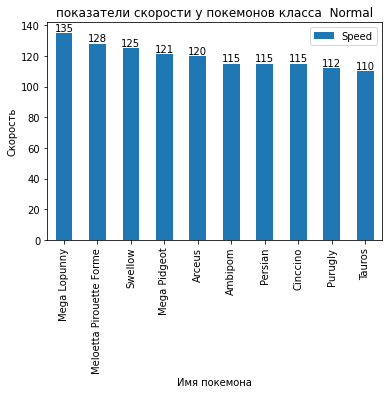

In [ ]:
normal = pokemon_normal[['Name', 'Speed']].groupby('Name').sum().sort_values('Speed', ascending=False).head(10)
normal.plot(kind='bar', title='показатели скорости у покемонов класса  Normal',
                             xlabel='Имя покемона',
                             ylabel='Скорость')
for i, val in enumerate(normal.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

Потребитель сыворотки Mega Lopunny самый быстрый в своём классе.

Задание № 5:\
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам.\
Проверьте, действительно ли сумма характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?\
Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.\
Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

Создадим датасеты с легендарными и нелегендарными покемонами.

In [ ]:
pokemon_legendary = pokemon[pokemon['Legendary']== True]
pokemon_legendary.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True


In [ ]:
pokemon_legendary.count()

pid          65
Name         65
Class 1      65
Class 2      40
HP           65
Attack       65
Defense      65
Sp. Atk      65
Sp. Def      65
Speed        65
Legendary    65
dtype: int64

In [ ]:
pokemon_simple = pokemon[pokemon['Legendary']== False]
pokemon_simple.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


Создадим столбец с суммой характеристик HP, Attack, Defense:

In [ ]:
pokemon_legendary['Sum'] = pokemon_legendary.apply(lambda row: row.HP + row.Attack + row.Defense, axis = 1)
pokemon_simple['Sum'] = pokemon_simple.apply(lambda row: row.HP + row.Attack + row.Defense, axis = 1)
pokemon_simple.head()

Создадим столбец с произведением характеристик HP, Attack, Defense:

In [ ]:
pokemon_legendary['Mult'] = pokemon_legendary.apply(lambda row: row.HP * row.Attack * row.Defense, axis = 1)
pokemon_simple['Mult'] = pokemon_simple.apply(lambda row: row.HP * row.Attack * row.Defense, axis = 1)
pokemon_simple.head()

Проверим распределения на нормальность:

In [ ]:
normal_dist([pokemon_legendary['Sum'], pokemon_simple['Sum']])

stat=0.966, p=0.073
stat=0.990, p=0.000


['Нормальное', 'Ненормальное']

Воспользуемся U-test Манна-Уитни для сравнения этих выборок:

In [ ]:
stat, p = stats.mannwhitneyu(pokemon_legendary['Sum'], pokemon_simple['Sum'])

print('Статистика = %.3f, p = %.9f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 42199.000, p = 0.000000000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [ ]:
normal_dist([pokemon_legendary['Mult'], pokemon_simple['Mult']])

stat=0.939, p=0.003
stat=0.840, p=0.000


['Ненормальное', 'Ненормальное']

In [ ]:
stat, p = stats.mannwhitneyu(pokemon_legendary['Mult'], pokemon_simple['Mult'])

print('Статистика = %.3f, p = %.9f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 42033.500, p = 0.000000000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


Нет уверенности в том, что можно сравнивать выборки такого разного объёма.

Допустим, что распределения нормальные, тогда применим T-test.

In [ ]:
f_test(pokemon_legendary['Sum'], pokemon_simple['Sum'])

'Вариация вероятно одинаковая'

In [ ]:
stat, p = stats.ttest_ind(pokemon_legendary['Sum'], pokemon_simple['Sum'])

print(f'Статистика = {stat:.5f}, p = {p:.9f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 11.59185, p = 0.000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
f_test(pokemon_legendary['Mult'], pokemon_simple['Mult'])

'Вариация разная'

In [ ]:
stat, p = stats.ttest_ind(pokemon_legendary['Mult'], pokemon_simple['Mult'], equal_var = False)

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 10.07908, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Задание № 6:\
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense.\
Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!\
Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

Для сравнения нескольких выборок воспользуемся дисперсионным анализом:

In [ ]:
stat, p = stats.f_oneway(pokemon_rock['Defense'], pokemon_ground['Defense'], pokemon_steel['Defense'], pokemon_ice['Defense'])

print('Статистика=%.3f, p=%.9f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=10.895, p=0.000001132
Отклоняем нулевую гипотезу, средние, вероятно, различаются


:# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 


<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [3]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

H0 - вероятно, в эффективности препаратов различий нет\
HA - различия есть

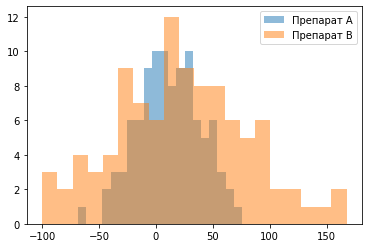

In [7]:
plt.hist(A, bins=20, alpha = 0.5); 
plt.hist(B, bins=20, alpha = 0.5);  
plt.legend(['Препарат А', 'Препарат В'])

Проверим выборки на нормальность распределений

In [19]:
normal_dist([A,B])

stat=0.995, p=0.967
stat=0.992, p=0.848


['Нормальное', 'Нормальное']

Можем применить T-test Стьюдента для сравнения выборок при уровне значимости = 0,001:

In [22]:
stat, p = stats.ttest_ind(A, B)

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -1.73380, p = 0.08451
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [23]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

Поскольку данные связаны, применим парный тест Стьюдента:

In [25]:
stat, p = stats.ttest_rel(A, B)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.001:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-2.17017, p=0.03239
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Был выбран уровень значимости 0,001, поэтому Н0 не отвергнута, но при уровне значимости 0,05, например, мы могли бы отвергнуть Н0.

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобрением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [26]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.

In [27]:
stat, p = stats.f_oneway(water, nutri, mineral)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=12.52596, p=0.00003
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Сравним эффекты от удобрения и минералки

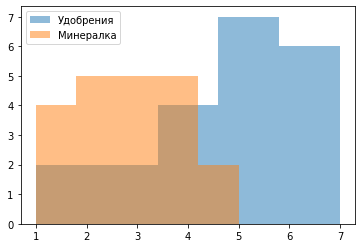

In [31]:
plt.hist(nutri, bins=5, alpha = 0.5); 
plt.hist(mineral, bins=5, alpha = 0.5);  
plt.legend(['Удобрения', 'Минералка'])

In [29]:
stat, p = stats.f_oneway(nutri, mineral)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=18.12872, p=0.00012
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Эффект от удобрения больше, чем от минералки.

<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 

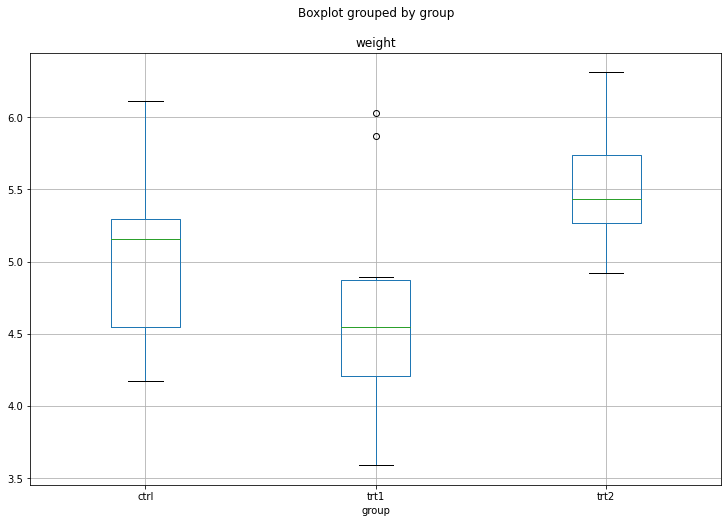

In [32]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   weight      30 non-null     float64
 2   group       30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [34]:
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


Разделим данные на группы для удобства:

In [35]:
ctrl = data[data['group'] == 'ctrl']
trt_1 = data[data['group'] == 'trt1']
trt_2 = data[data['group'] == 'trt2']

In [36]:
ctrl.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [37]:
trt_1.head()

,Unnamed: 0,weight,group
10,11,4.81,trt1
11,12,4.17,trt1
12,13,4.41,trt1
13,14,3.59,trt1
14,15,5.87,trt1


In [38]:
trt_2.head()

,Unnamed: 0,weight,group
20,21,6.31,trt2
21,22,5.12,trt2
22,23,5.54,trt2
23,24,5.50,trt2
24,25,5.37,trt2


Визуально лидирует группа удобрений trt2, проверим, насколько эти различия значимы, но для начала проверим наши данные на равенство дисперсий и нормальность:

In [41]:
normal_dist([ctrl['weight'], trt_1['weight'],trt_2['weight']])

stat=0.957, p=0.747
stat=0.930, p=0.452
stat=0.941, p=0.564


['Нормальное', 'Нормальное', 'Нормальное']

In [43]:
f_test(ctrl['weight'], trt_1['weight'])

'Вариация вероятно одинаковая'

In [44]:
f_test(ctrl['weight'], trt_2['weight'])

'Вариация вероятно одинаковая'

Поскольку распределение нормальное и дисперсии одинаковые, то мы можем проверить значимость различий между группой удобрений trt2 и остальными с помощью независимого теста Стьюдента на уровне значимости 0,05

In [46]:
stat, p = stats.ttest_ind(ctrl['weight'],trt_2['weight'])

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -2.13402, p = 0.04685
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [47]:
stat, p = stats.ttest_ind(trt_1['weight'],trt_2['weight'])

print(f'Статистика = {stat:.5f}, p = {p:.5f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -3.01010, p = 0.00752
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Можно посоветовать агроному использовать удобрения группы trt2, поскольку различия в эффективности удобрений между этой группой и остальными оказались значимыми при уровне значимости 0,05. Визуально мы можем наблюдать, что показатели урожайности этой группы удобрений выше.